In [15]:
import numpy as np
from numpy.ma.core import shape

from swinArm.datamodule import vocab
from swinArm.lit_swinPreArm import LitSwinPreARM
from torchvision.transforms import ToTensor, Normalize, Resize, Compose
import torch
from PIL import Image
from IPython.display import display

In [71]:
ckpt = '../checkpoint/epoch=103-val_loss=0.27032342553138733-step=260051-val_ExpRate=0.5215.ckpt'

In [72]:
comp = Compose([
    ToTensor(),
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    Resize((224, 224)),
])

In [73]:
model = LitSwinPreARM.load_from_checkpoint(ckpt)
model = model.eval()
device = torch.device("cpu")
model = model.to(device)

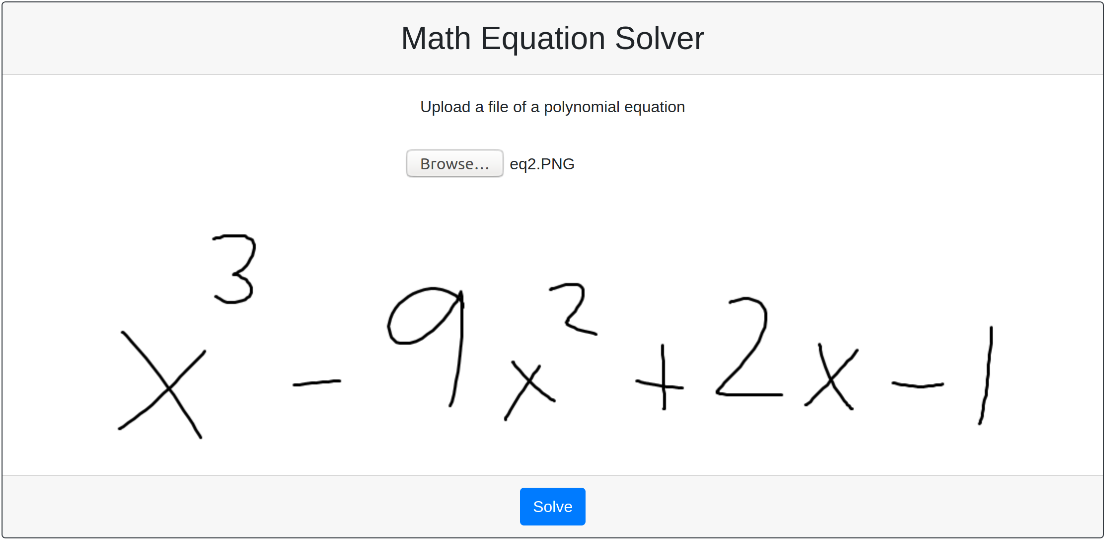

In [108]:
img = Image.open('original.png').convert('RGB')
display(img)

In [109]:
img = np.array(img)

In [110]:
img = comp(img)
mask = torch.zeros_like(img[-1,:,:], dtype=torch.bool)
hyp = model.approximate_joint_search(img.unsqueeze(0), 
                                     mask.unsqueeze(0))[0]
pred_latex = vocab.indices2label(hyp.seq)

In [111]:
print(pred_latex)

x ^ { 4 } - y x ^ { 2 } + 2 x - 1
